## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(output_units=10, num_neurons=[512, 256, 128], regular= l2, ratio=1e-4):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(x_train.shape[1:])
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regular(ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regular(ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

params = {'ratio':[1e-2, 1e-4, 1e-8, 1e-12],
          'regular': [l1, l2, l1_l2]}

In [7]:
"""
Set your training loop
"""
results = {}
from sklearn.model_selection import ParameterGrid
for g in ParameterGrid(params):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = ratio_{}, regular_{}".format(*g))
    model = build_mlp(**g)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-{}-{}".format(*g)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = ratio_ratio, regular_regular
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Ins

50000/50000 [==============================] - 3s 52us/step - loss: 2.4626 - acc: 0.0971 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.4626 - acc: 0.0972 - val_loss: 2.4627 - val_acc: 0.1000
Experiment with Regulizer = ratio_ratio, regular_regular
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3

50000/50000 [==============================] - 2s 50us/step - loss: 1.6142 - acc: 0.5260 - val_loss: 1.6637 - val_acc: 0.5099
Epoch 50/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.6081 - acc: 0.5264 - val_loss: 1.7180 - val_acc: 0.4846
Experiment with Regulizer = ratio_ratio, regular_regular
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)     

50000/50000 [==============================] - 3s 53us/step - loss: 2.4614 - acc: 0.0971 - val_loss: 2.4614 - val_acc: 0.1000
Experiment with Regulizer = ratio_ratio, regular_regular
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_______________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.1814 - acc: 0.2715 - val_loss: 2.0220 - val_acc: 0.3364
Epoch 2/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.9506 - acc: 0.3662 - val_loss: 1.8974 - val_acc: 0.3855
Epoch 3/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8593 - acc: 0.3991 - val_loss: 1.8377 - val_acc: 0.4071
Epoch 4/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8004 - acc: 0.4191 - val_loss: 1.7849 - val_acc: 0.4288
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7544 - acc: 0.4343 - val_loss: 1.7341 - val_acc: 0.4403
Epoch 6/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7132 - acc: 0.4492 - val_loss: 1.6982 - val_acc: 0.4545
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.6779 - acc: 0.4621 - val_loss: 1.6749 - val_acc

50000/50000 [==============================] - 3s 51us/step - loss: 16.1509 - acc: 0.3559 - val_loss: 14.9911 - val_acc: 0.3610
Epoch 3/50
50000/50000 [==============================] - 3s 50us/step - loss: 13.9634 - acc: 0.3784 - val_loss: 12.9835 - val_acc: 0.3848
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 12.1136 - acc: 0.3908 - val_loss: 11.2847 - val_acc: 0.3975
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 10.5420 - acc: 0.4015 - val_loss: 9.8310 - val_acc: 0.4075
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 9.2049 - acc: 0.4093 - val_loss: 8.6064 - val_acc: 0.4133
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 8.0665 - acc: 0.4145 - val_loss: 7.5549 - val_acc: 0.4176
Epoch 8/50
50000/50000 [==============================] - 3s 50us/step - loss: 7.0967 - acc: 0.4176 - val_loss: 6.6577 - val_acc: 0.4202
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 1.7169 - acc: 0.3988 - val_loss: 1.6769 - val_acc: 0.4143
Epoch 4/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.6536 - acc: 0.4232 - val_loss: 1.6266 - val_acc: 0.4282
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.6039 - acc: 0.4384 - val_loss: 1.6085 - val_acc: 0.4322
Epoch 6/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5649 - acc: 0.4521 - val_loss: 1.5655 - val_acc: 0.4485
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5305 - acc: 0.4628 - val_loss: 1.5425 - val_acc: 0.4547
Epoch 8/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.5007 - acc: 0.4720 - val_loss: 1.5119 - val_acc: 0.4679
Epoch 9/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.4743 - acc: 0.4800 - val_loss: 1.4872 - val_acc: 0.4752
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 50us/step - loss: 1.6670 - acc: 0.4148 - val_loss: 1.6599 - val_acc: 0.4147
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.6194 - acc: 0.4316 - val_loss: 1.6028 - val_acc: 0.4422
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5807 - acc: 0.4448 - val_loss: 1.5835 - val_acc: 0.4437
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5461 - acc: 0.4573 - val_loss: 1.5547 - val_acc: 0.4553
Epoch 8/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5185 - acc: 0.4661 - val_loss: 1.5293 - val_acc: 0.4591
Epoch 9/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.4912 - acc: 0.4769 - val_loss: 1.5046 - val_acc: 0.4691
Epoch 10/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.4638 - acc: 0.4859 - val_loss: 1.4846 - val_acc: 0.4746
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 3s 50us/step - loss: 8.7332 - acc: 0.4084 - val_loss: 8.1926 - val_acc: 0.4046
Epoch 6/50
50000/50000 [==============================] - 3s 50us/step - loss: 7.7100 - acc: 0.4158 - val_loss: 7.2495 - val_acc: 0.4196
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 6.8368 - acc: 0.4240 - val_loss: 6.4485 - val_acc: 0.4222
Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 6.0932 - acc: 0.4286 - val_loss: 5.7576 - val_acc: 0.4308
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 5.4577 - acc: 0.4337 - val_loss: 5.1744 - val_acc: 0.4322
Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 4.9147 - acc: 0.4387 - val_loss: 4.6721 - val_acc: 0.4391
Epoch 11/50
50000/50000 [==============================] - 3s 51us/step - loss: 4.4483 - acc: 0.4419 - val_loss: 4.2486 - val_acc: 0.4325
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 3s 54us/step - loss: 1.5783 - acc: 0.4495 - val_loss: 1.5821 - val_acc: 0.4407
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5459 - acc: 0.4596 - val_loss: 1.5539 - val_acc: 0.4560
Epoch 8/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5140 - acc: 0.4716 - val_loss: 1.5221 - val_acc: 0.4686
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4859 - acc: 0.4779 - val_loss: 1.4993 - val_acc: 0.4698
Epoch 10/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4596 - acc: 0.4887 - val_loss: 1.4880 - val_acc: 0.4762
Epoch 11/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4365 - acc: 0.4957 - val_loss: 1.4893 - val_acc: 0.4697
Epoch 12/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4128 - acc: 0.5051 - val_loss: 1.4783 - val_acc: 0.47341s - loss: 1.4150 - acc: - ETA: 1s - 
Epoch 13/50


50000/50000 [==============================] - 3s 52us/step - loss: 1.5436 - acc: 0.4577 - val_loss: 1.5447 - val_acc: 0.4579
Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5143 - acc: 0.4692 - val_loss: 1.5235 - val_acc: 0.4613
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4875 - acc: 0.4792 - val_loss: 1.5062 - val_acc: 0.4718
Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4609 - acc: 0.4866 - val_loss: 1.4872 - val_acc: 0.4753
Epoch 11/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4372 - acc: 0.4949 - val_loss: 1.4748 - val_acc: 0.4811
Epoch 12/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4148 - acc: 0.5014 - val_loss: 1.4717 - val_acc: 0.4768
Epoch 13/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3923 - acc: 0.5106 - val_loss: 1.4450 - val_acc: 0.4883
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 2s 50us/step - loss: 6.0891 - acc: 0.4298 - val_loss: 5.7638 - val_acc: 0.4326
Epoch 9/50
50000/50000 [==============================] - 3s 50us/step - loss: 5.4542 - acc: 0.4345 - val_loss: 5.1703 - val_acc: 0.4328
Epoch 10/50
50000/50000 [==============================] - 3s 50us/step - loss: 4.9103 - acc: 0.4405 - val_loss: 4.6662 - val_acc: 0.4407
Epoch 11/50
50000/50000 [==============================] - 2s 50us/step - loss: 4.4469 - acc: 0.4439 - val_loss: 4.2495 - val_acc: 0.4380
Epoch 12/50
50000/50000 [==============================] - 3s 50us/step - loss: 4.0494 - acc: 0.4476 - val_loss: 3.8835 - val_acc: 0.4410
Epoch 13/50
50000/50000 [==============================] - 3s 50us/step - loss: 3.7089 - acc: 0.4512 - val_loss: 3.5633 - val_acc: 0.4495
Epoch 14/50
50000/50000 [==============================] - 3s 50us/step - loss: 3.4168 - acc: 0.4554 - val_loss: 3.2969 - val_acc: 0.4548
Epoch 15/50
50000/50000 [======================

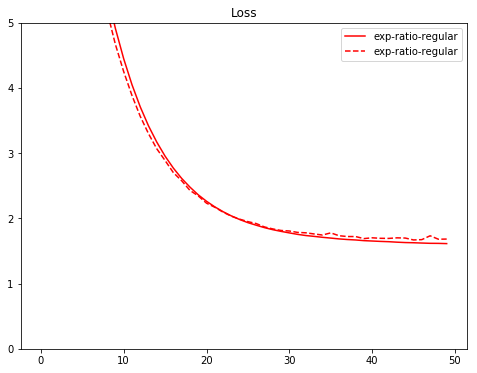

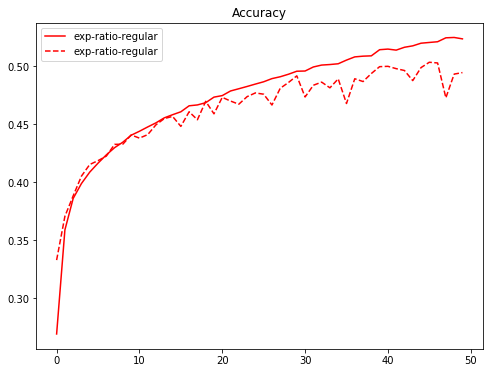

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()